#  VA #7 Comparing Countries English Vocalization  

#### Group 1:  Nina Nguyen, Melissa McClure, Nolan Orloff, Louie Wong 


### 1. Metadata exploration

In [10]:
import pandas as pd
import numpy as np
from numpy import array, diff, where, split
from scipy import arange
import soundfile
import numpy, scipy
import pylab
import copy
import matplotlib
import statistics

In [11]:
df = pd.read_csv('./speech-accent-archive/speakers_all.csv')

In [12]:
import pandas as pd

In [13]:
df = df[df['file_missing?']==False].iloc[:, :8]
df = df.replace('female', 'famale')
df

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country
32,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,famale,1,south africa
33,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa
34,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3,afrikaans,male,418,south africa
35,26.0,8.0,"pretoria, south africa",afrikaans4,afrikaans,male,1159,south africa
36,19.0,6.0,"cape town, south africa",afrikaans5,afrikaans,male,1432,south africa
...,...,...,...,...,...,...,...,...
2167,46.0,5.0,"lagos, nigeria",yoruba3,yoruba,famale,766,nigeria
2168,46.0,12.0,"lagos, nigeria",yoruba4,yoruba,male,851,nigeria
2169,47.0,2.0,"ibadan, nigeria",yoruba5,yoruba,famale,2023,nigeria
2170,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,famale,571,usa


### 2. Audio file exploration

In [14]:
%%bash 
cd speech-accent-archive/recordings/recordings
ls -l | head -5

total 1865360
-rw-rw-r--@ 1 louiewhw  staff   333530 Sep 21 16:16 afrikaans1.mp3
-rw-rw-r--@ 1 louiewhw  staff   352756 Sep 21 16:16 afrikaans2.mp3
-rw-rw-r--@ 1 louiewhw  staff   431332 Sep 21 16:16 afrikaans3.mp3
-rw-rw-r--@ 1 louiewhw  staff   376998 Sep 21 16:16 afrikaans4.mp3


In [15]:
import os
import glob
import urllib
import scipy.io.wavfile
import pydub

audiolist = glob.glob("./speech-accent-archive/recordings/recordings/*.mp3")
audiolist[:5][0].split('/')[4].split('.')[0]

'kikongo1'

#### 2a. mp3 -> wav

In [ ]:

for i in audiolist:
    filename = i.split('/')[4].split('.')[0]
    sound = pydub.AudioSegment.from_mp3(i)
    sound = sound.export("wav/" + filename + ".wav", format="wav")


#### 2b. Sample plotting

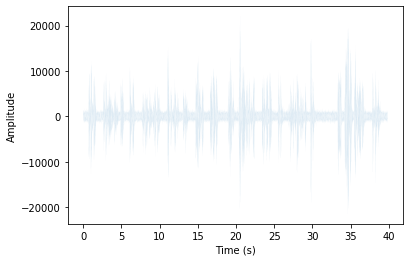

In [34]:
import matplotlib.pyplot as plt
import plotly.express as ex
rate,audData=scipy.io.wavfile.read("wav/kikongo1.wav")
time = np.arange(0, float(audData.shape[0]), 1) / rate
plt.plot(time, audData, linewidth=0.01, alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()


### 3. Get features

#### 3a. Max freq

In [22]:
def get_max_freq(file_path):
    audio_samples, sample_rate = soundfile.read(file_path, dtype='int16')
    number_samples = len(audio_samples)
    #print('Audio Samples: ', audio_samples)
    #print('Number of Sample: ', number_samples)
    #print('Sample Rate: ', sample_rate)

    #duration of the audio file
    duration = round(number_samples/sample_rate, 2)
    #print('Audio Duration: {0}s'.format(duration))

    #List of possible frequencies_bins
    freq_bins = arange(number_samples//2) * sample_rate/number_samples
    #print('Frequency bins: ', freq_bins)

    #(Fast Fourier transform algorithm) FFT calculation
    fft_data = scipy.fft(audio_samples)
    #print('FFT Length: ', len(fft_data))
    #print('FFT data: ', fft_data)

    freq_bins = freq_bins[range(number_samples//2)]


    return numpy.round(numpy.amax(freq_bins))

#### 3b. Find length

In [26]:
def get_length(wav_path):
    with contextlib.closing(wave.open(i,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        return duration

#### 3c. Find dB

In [27]:
def get_db(path):
    
    #file_path = 'afrikaans1.wav'
    audio_samples, sample_rate = soundfile.read(path, dtype='int16')
    db = 20*np.log10(np.sqrt(np.mean(np.absolute(audio_samples)**2)))
    return db

#### 2c. Find length of all wav

In [28]:
import wave
import contextlib
wavlist = glob.glob("./wav/*.wav")
temp = pd.DataFrame(columns=['filename', 'audio_length', 'max_freq', 'db'])
for i in wavlist:
    filename = i.split('/')[2].split('.')[0]
    freq=get_max_freq(i)
    duration=get_length(i)
    db=get_db(i)
    temp = temp.append({'filename': filename, 'audio_length': duration, 'max_freq':freq, 'db':db}, ignore_index=True)
    print('done ', filename)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.


done  russian12
done  nepali2
done  armenian4
done  amharic15
done  english101
done  romanian6
done  german19
done  french14
done  mandarin3
done  english7
done  english115
done  miskito8
done  german25
done  french28
done  german31
done  vietnamese17
done  english129
done  cantonese9
done  arabic96
done  arabic82
done  korean6
done  portuguese13
done  uyghur2
done  swedish19
done  tswana2
done  spanish162
done  english465
done  arabic55
done  english303
done  taiwanese4
done  mandarin53
done  mandarin47
done  arabic41
done  english317
done  turkish28
done  english471
done  english459
done  croatian2
done  arabic69
done  turkish14
done  faroese1
done  ukrainian8
done  spanish39
done  yapese1
done  spanish11
done  english288
done  german1
done  english511
done  english277
done  japanese5
done  english263
done  english505
done  kurdish1
done  dutch41
done  korean17
done  mongolian4
done  english539
done  norwegian4
done  bai1
done  english46
done  portuguese4
done  english52
done  khmer6

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


done  english86
done  oriya2
done  bafang2
done  sylheti1
done  english87
done  spanish7
done  english93
done  english78
done  khmer4
done  russian9
done  vietnamese3
done  english44
done  norwegian6
done  english50
done  portuguese6
done  english249
done  mongolian6
done  korean15
done  slovenian2
done  english275
done  english513
done  dutch43
done  kurdish3
done  english507
done  korean29
done  papiamentu1
done  english261
done  japanese7
done  spanish13
done  german3
done  turkish16
done  english329
done  mandarin51
done  taiwanese6
done  english301
done  arabic57
done  english467
done  bengali8
done  english473
done  english315
done  arabic43
done  mandarin45
done  portuguese39
done  english498
done  spanish160
done  arabic94
done  spanish148
done  portuguese11
done  korean4
done  arabic80
done  german27
done  german33
done  vietnamese15
done  french16
done  romanian4
done  english103
done  amharic17
done  english117
done  english5
done  mandarin1
done  latvian2
done  russian38
do

done  hausa6
done  spanish58
done  kikuyu1
done  english438
done  farsi18
done  yupik1
done  italian28
done  english404
done  english362
done  arabic34
done  mandarin32
done  mandarin26
done  english376
done  arabic20
done  english410
done  italian14
done  mauritian1
done  dutch9
done  spanish117
done  gujarati2
done  english389
done  pashto2
done  spanish103
done  bulgarian4
done  urdu5
done  romanian11
done  french49
done  hungarian1
done  hindi10
done  polish22
done  english148
done  english160
done  french61
done  kiswahili9
done  bosnian9
done  english174
done  french1
done  macedonian24
done  finnish5
done  wolof2
done  macedonian18
done  macedonian20
done  garifuna2
done  french5
done  ebira1
done  serer1
done  tagalog4
done  wolof6
done  finnish1
done  estonian4
done  french59
done  polish26
done  serbian4
done  italian8
done  hindi14
done  hungarian5
done  polish32
done  romanian15
done  english158
done  english170
done  krio4
done  english164
done  pashto6
done  spanish107
do

done  spanish79
done  thai7
done  danish5
done  hindi3
done  kikongo2
done  english419
done  arabic29
done  english425
done  italian21
done  mandarin13
done  english343
done  arabic15
done  farsi11
done  english357
done  yiddish1
done  english431
done  spanish136
done  spanish122
done  english380
done  fijian3
done  portuguese47
done  english394
done  polish17
done  punjabi6
done  english169
done  malay3
done  english141
done  french54
done  italian5
done  serbian9
done  french40
done  hungarian8
done  romanian18
done  english155
done  gan1
done  macedonian11
done  english182
done  bengali14
done  french8
done  russian46
done  english196
done  tagalog9
done  finnish8
done  macedonian15
done  english192
done  russian42
done  bengali10
done  english186
done  afrikaans3
done  romanian20
done  punjabi2
done  kiswahili4
done  polish13
done  bosnian4
done  english179
done  english151
done  french44
done  kabyle1
done  italian1
done  ife1
done  french50
done  english145
done  bulgarian9
done 

done  english58
done  hmong1
done  catalan2
done  turkish8
done  bambara1
done  turkish9
done  catalan3
done  vlaams1
done  somali1
done  ashanti1
done  english59
done  arabic100
done  english65
done  cebuano1
done  thai12
done  swedish3
done  english71
done  korean20
done  english268
done  korean34
done  english254
done  english532
done  english526
done  english240
done  spanish32
done  sesotho1
done  spanish26
done  ukrainian3
done  serbian15
done  english297
done  greek10
done  english283
done  bengali1
done  turkish23
done  urdu16
done  turkish37
done  english308
done  mandarin58
done  english320
done  arabic76
done  english446
done  english452
done  mandarin64
done  english334
done  arabic62
done  arabic89
done  swedish12
done  portuguese18
done  spanish155
done  chaldean1
done  ga2
done  bari1
done  amharic4
done  spanish141
done  cantonese2
done  ngemba2
done  portuguese24
done  english485
done  moore1
done  macedonian4
done  english491
done  portuguese30
done  mandarin8
done  v

In [37]:
temp.describe()

,audio_length,max_freq,db
count,2138.000000,2138.000000,2136.000000
mean,27.716418,21804.080917,31.486157
std,8.046024,1847.364666,1.728203
min,15.768277,8000.000000,14.768126
25%,22.290799,22050.000000,30.692242
50%,25.716270,22050.000000,31.735873
75%,30.984161,22050.000000,32.615927
max,106.536000,24000.000000,36.970216


#### Added column length

In [38]:
df = pd.merge(df, temp, on=['filename'])
df

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,audio_length,max_freq,db
0,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,famale,1,south africa,20.772268,22050.0,32.041606
1,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa,21.961497,22050.0,30.099805
2,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3,afrikaans,male,418,south africa,26.880000,22050.0,32.750677
3,26.0,8.0,"pretoria, south africa",afrikaans4,afrikaans,male,1159,south africa,23.471179,22050.0,28.114996
4,19.0,6.0,"cape town, south africa",afrikaans5,afrikaans,male,1432,south africa,20.252404,22050.0,32.451574
...,...,...,...,...,...,...,...,...,...,...,...
2133,46.0,5.0,"lagos, nigeria",yoruba3,yoruba,famale,766,nigeria,35.032562,22050.0,33.634372
2134,46.0,12.0,"lagos, nigeria",yoruba4,yoruba,male,851,nigeria,34.287687,22050.0,34.061358
2135,47.0,2.0,"ibadan, nigeria",yoruba5,yoruba,famale,2023,nigeria,41.367732,22050.0,34.461117
2136,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,famale,571,usa,24.118549,22050.0,32.858549


In [40]:
df.to_csv('df.csv', index = None, header=True)

In [43]:
df

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,audio_length,max_freq,db
0,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,famale,1,south africa,20.772268,22050.0,32.041606
1,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa,21.961497,22050.0,30.099805
2,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3,afrikaans,male,418,south africa,26.880000,22050.0,32.750677
3,26.0,8.0,"pretoria, south africa",afrikaans4,afrikaans,male,1159,south africa,23.471179,22050.0,28.114996
4,19.0,6.0,"cape town, south africa",afrikaans5,afrikaans,male,1432,south africa,20.252404,22050.0,32.451574
...,...,...,...,...,...,...,...,...,...,...,...
2133,46.0,5.0,"lagos, nigeria",yoruba3,yoruba,famale,766,nigeria,35.032562,22050.0,33.634372
2134,46.0,12.0,"lagos, nigeria",yoruba4,yoruba,male,851,nigeria,34.287687,22050.0,34.061358
2135,47.0,2.0,"ibadan, nigeria",yoruba5,yoruba,famale,2023,nigeria,41.367732,22050.0,34.461117
2136,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,famale,571,usa,24.118549,22050.0,32.858549


In [44]:
a = df[['country', 'sex', 'audio_length', 'max_freq', 'db']].groupby(['country', 'sex']).mean()

In [45]:
a

audio_length  max_freq         db
country     sex                                      
afghanistan famale     39.779923   22050.0  32.293541
            male       36.269187   22050.0  32.613782
albania     famale     25.781565   15025.0  31.914547
            male       26.631300   22050.0  31.501474
algeria     famale     24.905828   22050.0  31.582011
...                          ...       ...        ...
virginia    male       29.975193   22050.0  32.343476
yemen       male       26.302857   22050.0  29.907529
yugoslavia  male       38.646417   22050.0  33.199720
zambia      famale     19.329841   22050.0  30.268083
zimbabwe    famale     25.247672   22050.0  32.829963

[296 rows x 3 columns]

In [ ]:
a.to_csv('country.csv', index = None, header=True)